In [45]:
import pandas as pd
region_data = pd.read_excel(r'E:\2022Math\coding\附件3：长春市9个区交通网络数据和主要小区相关数据.xlsx', sheet_name=2)
lukou_data = pd.read_excel(r'E:\2022Math\coding\附件3：长春市9个区交通网络数据和主要小区相关数据.xlsx', sheet_name=0)
luxian_data = pd.read_excel(r'E:\2022Math\coding\附件3：长春市9个区交通网络数据和主要小区相关数据.xlsx', sheet_name=1)

In [136]:
region_data['小区人口数（人）'].sum()

3019825

In [120]:
ganran_data = pd.read_excel(r'E:\2022Math\coding\附件1：长春市COVID-19疫情期间病毒感染人数数据.xlsx', sheet_name=0)
wuzhengzhaung_data = pd.read_excel(r'E:\2022Math\coding\附件1：长春市COVID-19疫情期间病毒感染人数数据.xlsx', sheet_name=1)

In [121]:
wuzhengzhaung_data = wuzhengzhaung_data.rename(columns={'长春新区':'长春新区(高新)'})
ganran_data = ganran_data.rename(columns={'长春新区':'长春新区(高新)'})

In [124]:
wuzhengzhaung_data

,区域,全市总计,九台区,长春新区(高新),净月区,绿园区,朝阳区,经开区,双阳区,宽城区,南关区,汽开区,二道区,莲花山区,Unnamed: 14,公主岭市,德惠市,榆树市,农安县
0,44624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44626,5.0,2.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,44627,6.0,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,44628,10.0,7.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,5月20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,5月21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,5月22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,5月23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
kuanchang_data_1 = region_data[region_data['所属区域'] == '宽城区'].reset_index()
erdao_data_2 = region_data[region_data['所属区域'] == '二道区'].reset_index()
chaoyang_data_3 = region_data[region_data['所属区域'] == '朝阳区'].reset_index()
lvyuan_data_4 = region_data[region_data['所属区域'] == '绿园区'].reset_index()
nanguan_data_5 = region_data[region_data['所属区域'] == '南关区'].reset_index()
jingkai_data_6 = region_data[region_data['所属区域'] == '经开区'].reset_index()
changcunxinqu_data_7 = region_data[region_data['所属区域'] == '长春新区(高新)'].reset_index()
jingyue_data_8 = region_data[region_data['所属区域'] == '净月区'].reset_index()
qikai_data_9 = region_data[region_data['所属区域'] == '汽开区'].reset_index()

In [47]:
lukou_data = lukou_data.iloc[:, 1:3]

In [74]:
lukou_data[lukou_data['所属区域']=='经开区'].shape[0]

590

In [60]:
lukou_data.to_csv('道路节点分布区域.csv',encoding='utf-8_sig')

In [53]:
for i in range(lukou_data.shape[0]):
    dist_ =[]
    for j in range(region_data.shape[0]):
        dist = pow((region_data['小区横坐标'][j]-lukou_data['路口横坐标'][i]), 2)+\
               pow((region_data['小区纵坐标'][j]-lukou_data['路口纵坐标'][i]), 2)
        dist_.append(dist)
    min_index = dist_.index(min(dist_))
    lukou_data['所属区域'][i] = region_data['所属区域'][min_index]

In [129]:
changcunxinqu_data_7['所属区域'][0]

'长春新区(高新)'

In [104]:
region_list = [kuanchang_data_1, erdao_data_2, chaoyang_data_3, lvyuan_data_4,nanguan_data_5,jingkai_data_6,
               changcunxinqu_data_7, jingyue_data_8, qikai_data_9]

In [130]:
question2_data = pd.DataFrame(data=None, columns=['小区数量','楼栋数量', '总户数', '总人口数量',
                                                  '道路节点数量', '累计感染者数量', '累计无症状感染者数量', '区域面积'],
                              index=['宽城区','二道区','朝阳区' ,'绿园区', '南关区', '经开区', '长春新区(高新)', '净月区', '汽开区'])
for i in region_list:
    question2_data['小区数量'][i['所属区域'][0]] = i.shape[0]
    question2_data['楼栋数量'][i['所属区域'][0]] = i['小区栋数'].sum()
    question2_data['总户数'][i['所属区域'][0]] = i['小区户数（户）'].sum()
    question2_data['总人口数量'][i['所属区域'][0]] = i['小区人口数（人）'].sum()
    question2_data['道路节点数量'][i['所属区域'][0]] = \
        lukou_data[lukou_data['所属区域']==i['所属区域'][0]].shape[0]
    question2_data['累计感染者数量'][i['所属区域'][0]] = ganran_data[i['所属区域'][0]].sum()
    question2_data['累计无症状感染者数量'][i['所属区域'][0]] = wuzhengzhaung_data[i['所属区域'][0]].sum()

In [134]:
question2_data.to_csv('question2_data.csv', encoding='utf-8_sig')

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

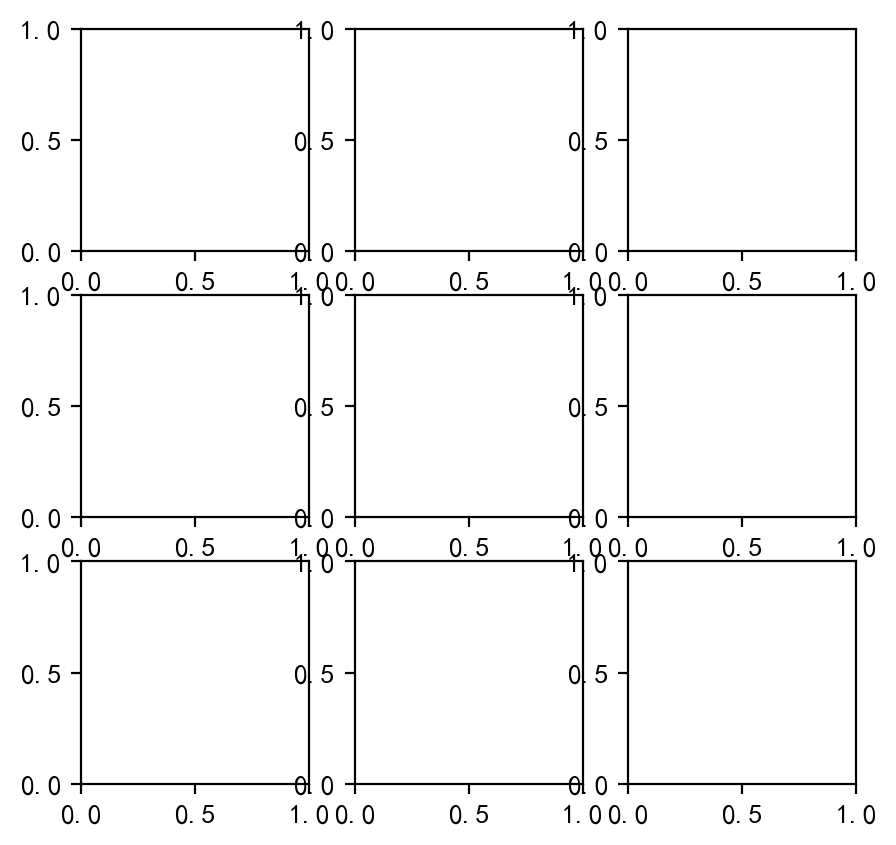

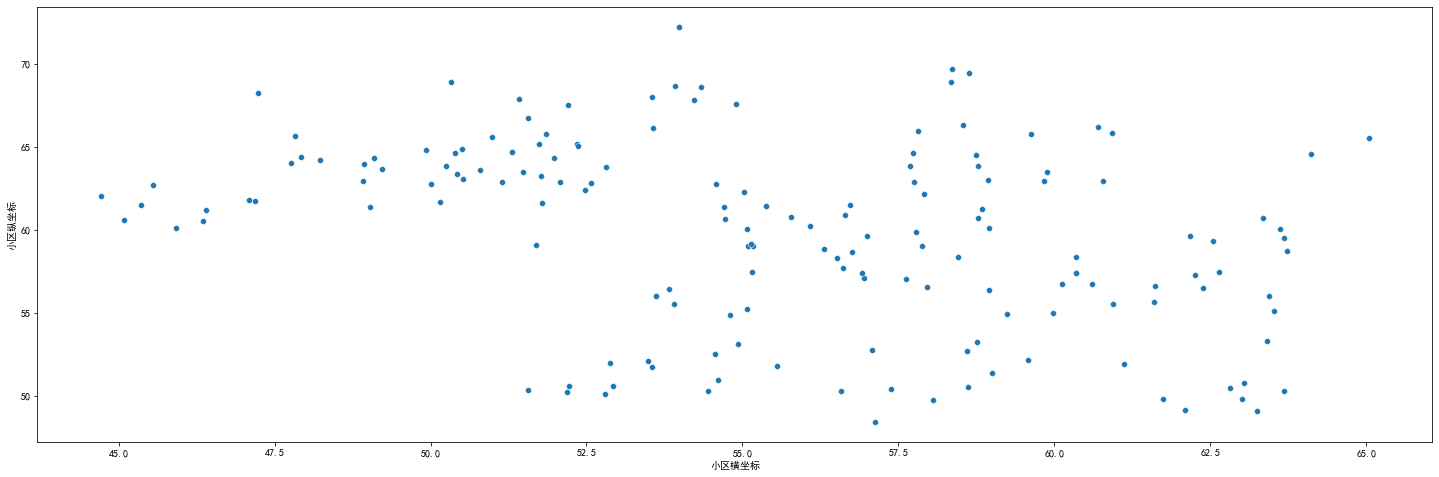

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(5, 5), dpi=200)
plt.figure(figsize=(25, 8))
axes[0, 0] = sns.scatterplot(x=kuanchang_data_1['小区横坐标'], y=kuanchang_data_1['小区纵坐标'])  # 散点图给出一个ax，然后在ax上面进行图的操作
axes.set_title('宽城区小区分布散点图', fontproperties='SimHei', fontsize=20)  # 为子图添加标题，设置标题的字体，字体的大小，字体的颜色
axes.set_xlabel('')  # 为x轴添加标签
axes.set_ylabel('')  # 为y轴添加标签
plt.show()